In [1]:
import numpy as np

print("--- 1. CREACIÓN Y FORMA ---")
# Crear 12 números. Shape: (12,)
a = np.arange(12)
print(f"Original: {a}")

# Cambiar a matriz 3x4. Shape: (3, 4)
matriz = a.reshape(3, 4)
print(f"\nMatriz (3x4):\n{matriz}")

print("\n--- 2. OPERACIONES Y EJES ---")
# Sumar todo
print(f"Suma total: {matriz.sum()}")
# Sumar por columnas (axis=0 -> aplasta verticalmente)
print(f"Suma columnas (axis=0): {matriz.sum(axis=0)}") 
# Resultado esperado: [0+4+8, 1+5+9...] -> [12, 15, 18, 21]

print("\n--- 3. INDEXING Y COPY ---")
# Cortamos un trozo (esquina superior izquierda 2x2)
trozo = matriz[:2, :2].copy() # ¡Usamos copy para seguridad!
trozo[:] = 99
print(f"Trozo modificado:\n{trozo}")
print(f"Original intacto (gracias al copy):\n{matriz}")

print("\n--- 4. FILTRADO BOOLEANO (CYBER) ---")
# Imagina que buscamos puertos prohibidos (> 5)
# La máscara es: [False, False... True, True...]
puertos_prohibidos = a[a > 5]
print(f"Valores > 5: {puertos_prohibidos}")

print("\n--- 5. TRANSPOSICIÓN ---")
# Girar la matriz (Filas x Columnas)
print(f"Transpuesta (.T):\n{matriz.T}")

--- 1. CREACIÓN Y FORMA ---
Original: [ 0  1  2  3  4  5  6  7  8  9 10 11]

Matriz (3x4):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

--- 2. OPERACIONES Y EJES ---
Suma total: 66
Suma columnas (axis=0): [12 15 18 21]

--- 3. INDEXING Y COPY ---
Trozo modificado:
[[99 99]
 [99 99]]
Original intacto (gracias al copy):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

--- 4. FILTRADO BOOLEANO (CYBER) ---
Valores > 5: [ 6  7  8  9 10 11]

--- 5. TRANSPOSICIÓN ---
Transpuesta (.T):
[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [4]:
print("\n--- 6. MATRICES ESPECIALES ---") 
print(np.zeros((2,3))) # Matriz 2x3 de ceros
print("-"*15)
print(np.ones((4,2)))   # Matriz 4x2 de unos


--- 6. MATRICES ESPECIALES ---
[[0. 0. 0.]
 [0. 0. 0.]]
---------------
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


In [5]:
import numpy as np

print("=== 1. LA TRAMPA DEL TIPO DE DATO ===")
lista_mixta = [10, 20, 3.14] # Enteros y un float
arr_mixto = np.array(lista_mixta)
print(f"Original: {lista_mixta}")
print(f"NumPy:    {arr_mixto}") 
print(f"Dtype:    {arr_mixto.dtype}") 
# Nota: Todo se volvió punto flotante (3.14 contaminó al 10 y 20)


print("\n=== 2. ARANGE VS LINSPACE ===")
# Queremos ir del 0 al 10.
# ARANGE: Yo decido el PASO (de 2 en 2)
# Riesgo: No sé cuántos números saldrán ni si llegaré al 10 exacto.
arr_arange = np.arange(0, 10, 2)
print(f"Arange (stop excluido): {arr_arange}")

# LINSPACE: Yo decido la CANTIDAD (quiero 5 postes exactos)
# Ventaja: El 10 sí sale y los intervalos son perfectos.
arr_linspace = np.linspace(0, 10, 5)
print(f"Linspace (stop incluido): {arr_linspace}")


print("\n=== 3. MEMORIA Y DTYPE ===")
# Crear una matriz gigante de ceros
# Por defecto usa float64 (8 bytes por número)
grande = np.zeros((1000, 1000)) 
print(f"Peso por defecto: {grande.nbytes / 1024:.2f} KB")

# Optimizada (usando int8, 1 byte por número)
pequeña = np.zeros((1000, 1000), dtype='int8')
print(f"Peso optimizado:  {pequeña.nbytes / 1024:.2f} KB")
# ¡La optimizada pesa 8 veces menos!


print("\n=== 4. EL PELIGRO DE EMPTY ===")
# empty pide memoria pero no la limpia. Verás "basura" numérica.
basura = np.empty((2, 2))
print("Lo que había en la RAM (Empty):\n", basura)

=== 1. LA TRAMPA DEL TIPO DE DATO ===
Original: [10, 20, 3.14]
NumPy:    [10.   20.    3.14]
Dtype:    float64

=== 2. ARANGE VS LINSPACE ===
Arange (stop excluido): [0 2 4 6 8]
Linspace (stop incluido): [ 0.   2.5  5.   7.5 10. ]

=== 3. MEMORIA Y DTYPE ===
Peso por defecto: 7812.50 KB
Peso optimizado:  976.56 KB

=== 4. EL PELIGRO DE EMPTY ===
Lo que había en la RAM (Empty):
 [[ 2.5  5. ]
 [ 7.5 10. ]]


In [6]:
import numpy as np

print("=== 1. DIFERENCIA 1D vs 2D (Pregunta de examen) ===")
a = np.array([1, 2, 3])
print(f"Shape (3,):  {a.shape}  -> Vector plano (Rank 1)")
b = a.reshape(1, 3)
print(f"Shape (1,3): {b.shape} -> Matriz fila (Rank 2)")
c = a.reshape(3, 1)
print(f"Shape (3,1): {c.shape} -> Matriz columna (Rank 2)")


print("\n=== 2. LA REGLA DE CONSERVACIÓN ===")
datos = np.arange(12) # 12 ladrillos
try:
    # Intentamos hacer una matriz de 5x3 = 15 huecos
    fallo = datos.reshape(5, 3)
except ValueError as e:
    print("¡Error detectado! No puedes meter 12 datos en 15 huecos.")
    print(f"Mensaje: {e}")


print("\n=== 3. EL COMODÍN -1 (Vital para IA) ===")
# Imagina que tienes una imagen a color: 3 canales x 2 ancho x 2 alto = 12 datos
imagen = datos.reshape(3, 2, 2) 
print(f"Imagen original (3,2,2):\n{imagen}")

# Queremos "aplanar" cada canal en una fila. 
# Queremos 3 filas (canales), y "lo que sea" de columnas.
aplanado = datos.reshape(3, -1)
print(f"\nReshape(3, -1) -> NumPy calculó (3, 4):\n{aplanado}")


print("\n=== 4. FLATTEN VS RAVEL (Memoria) ===")
original = np.array([[1, 2], [3, 4]])

# RAVEL (Vista - Peligroso pero rápido)
vista = original.ravel()
vista[0] = 999 # Modificamos la vista

print(f"Original después de modificar ravel:\n{original}")
# ¡El original cambió a 999!

# FLATTEN (Copia - Seguro pero lento)
original[0,0] = 1 # Restauramos
copia = original.flatten()
copia[0] = 888 # Modificamos la copia

print(f"\nOriginal después de modificar flatten:\n{original}")
# ¡El original sigue siendo 1! No se vio afectado.

=== 1. DIFERENCIA 1D vs 2D (Pregunta de examen) ===
Shape (3,):  (3,)  -> Vector plano (Rank 1)
Shape (1,3): (1, 3) -> Matriz fila (Rank 2)
Shape (3,1): (3, 1) -> Matriz columna (Rank 2)

=== 2. LA REGLA DE CONSERVACIÓN ===
¡Error detectado! No puedes meter 12 datos en 15 huecos.
Mensaje: cannot reshape array of size 12 into shape (5,3)

=== 3. EL COMODÍN -1 (Vital para IA) ===
Imagen original (3,2,2):
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]

Reshape(3, -1) -> NumPy calculó (3, 4):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

=== 4. FLATTEN VS RAVEL (Memoria) ===
Original después de modificar ravel:
[[999   2]
 [  3   4]]

Original después de modificar flatten:
[[1 2]
 [3 4]]


In [7]:
import numpy as np

print("=== CASO 1: EL PELIGRO (VISTA) ===")
# 1. Array original (Tus notas finales, por ejemplo)
notas = np.array([10, 20, 30, 40, 50])
print(f"Notas Originales: {notas}")

# 2. Hacemos un Slice (Creamos una 'vista' de las dos primeras)
# NO estamos copiando, solo estamos mirando las mismas notas
primeras_notas = notas[:2] 

# 3. Modificamos la vista
print("\n>> Modificando la vista: Cambiamos el 10 por 999...")
primeras_notas[0] = 999

# 4. EL DESASTRE
print(f"Vista modificada: {primeras_notas}")
print(f"Original:         {notas}") 
# ¡SORPRESA! El original cambió a [999, 20, 30...]. 
# Rompiste tus datos originales sin querer.


print("\n\n=== CASO 2: LA SOLUCIÓN (.copy) ===")
# Reiniciamos datos
notas_seguras = np.array([10, 20, 30, 40, 50])
print(f"Originales: {notas_seguras}")

# 1. Hacemos una COPIA real
# NumPy reserva memoria nueva y clona los datos ahí.
mis_apuntes = notas_seguras[:2].copy() 

# 2. Modificamos la copia
print("\n>> Modificando la copia: Cambiamos el 10 por 888...")
mis_apuntes[0] = 888

# 3. LA SEGURIDAD
print(f"Copia modificada:   {mis_apuntes}")
print(f"Original protegido: {notas_seguras}")
# ¡El original sigue siendo [10, 20...]!

=== CASO 1: EL PELIGRO (VISTA) ===
Notas Originales: [10 20 30 40 50]

>> Modificando la vista: Cambiamos el 10 por 999...
Vista modificada: [999  20]
Original:         [999  20  30  40  50]


=== CASO 2: LA SOLUCIÓN (.copy) ===
Originales: [10 20 30 40 50]

>> Modificando la copia: Cambiamos el 10 por 888...
Copia modificada:   [888  20]
Original protegido: [10 20 30 40 50]


In [8]:
import numpy as np

print("=== SIMULACIÓN DE SOC: DETECCIÓN DE FUERZA BRUTA ===\n")

# 1. DATOS DE ENTRADA (Lo que ves en el SIEM)
# Array de IPs (Simuladas como strings)
ips = np.array(['192.168.1.1', '10.0.0.5', '192.168.1.50', '172.16.0.1', '10.0.0.99'])

# Array de conteo de intentos de login en 1 minuto
intentos = np.array([2, 500, 1, 1200, 3])

print("IPs analizadas:       ", ips)
print("Intentos registrados: ", intentos)

# ---------------------------------------------------------
# PASO 1: LA REGLA DEL FIREWALL (La Condición)
# ---------------------------------------------------------
# Regla: "Cualquier IP con más de 100 intentos es un ataque"
mascara_ataque = intentos > 100

print(f"\n1. Máscara Booleana (¿Es ataque?):\n   {mascara_ataque}")
# Resultado: [False, True, False, True, False]
# Fíjate que la posición 1 y 3 son True.

# ---------------------------------------------------------
# PASO 2: LA EXTRACCIÓN (El Filtrado)
# ---------------------------------------------------------
# Usamos la máscara de 'intentos' para filtrar el array de 'ips'.
# Esto es potentísimo: Filtramos la Lista A basándonos en la Lista B.
ips_atacantes = ips[mascara_ataque]
intentos_ataque = intentos[mascara_ataque]

print(f"\n2. ALERTA: IPs Bloqueadas:")
# Unimos para ver el reporte
for ip, count in zip(ips_atacantes, intentos_ataque):
    print(f"   -> BLOQUEADA: {ip} ({count} intentos)")

# ---------------------------------------------------------
# PASO 3: ANÁLISIS DE DATOS LIMPIOS (AI)
# ---------------------------------------------------------
# Ahora queremos analizar el tráfico "normal" para entrenar una IA.
# Invertimos la máscara con ~ (virgulilla/not)
trafico_normal = intentos[~mascara_ataque] # El símbolo ~ invierte True/False

print(f"\n3. Tráfico legítimo para estadísticas: {trafico_normal}")
print(f"   Promedio de uso normal: {trafico_normal.mean()} intentos")

=== SIMULACIÓN DE SOC: DETECCIÓN DE FUERZA BRUTA ===

IPs analizadas:        ['192.168.1.1' '10.0.0.5' '192.168.1.50' '172.16.0.1' '10.0.0.99']
Intentos registrados:  [   2  500    1 1200    3]

1. Máscara Booleana (¿Es ataque?):
   [False  True False  True False]

2. ALERTA: IPs Bloqueadas:
   -> BLOQUEADA: 10.0.0.5 (500 intentos)
   -> BLOQUEADA: 172.16.0.1 (1200 intentos)

3. Tráfico legítimo para estadísticas: [2 1 3]
   Promedio de uso normal: 2.0 intentos


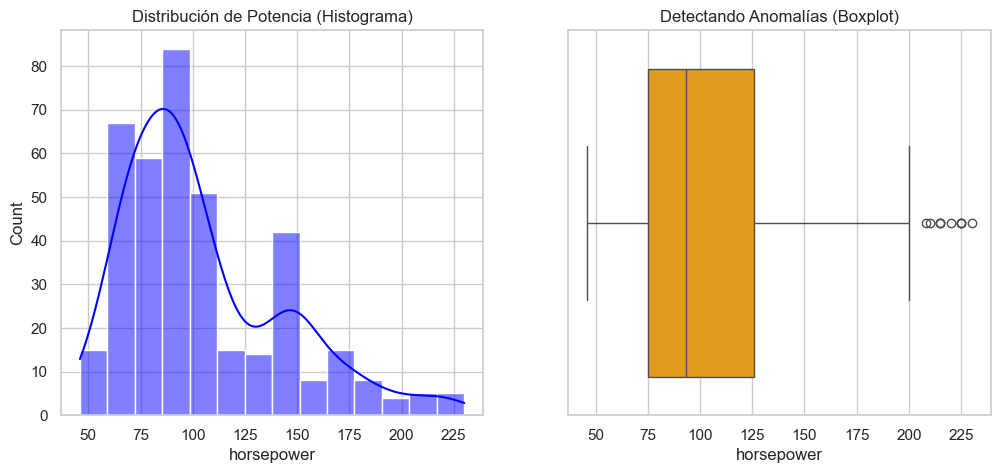

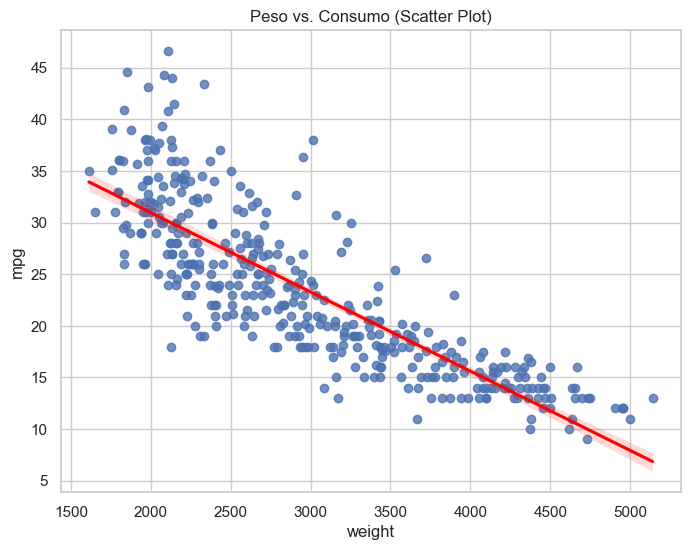

C:\Users\alere\AppData\Local\Temp\ipykernel_4116\272043542.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='origin', y='horsepower', estimator=np.mean, palette='viridis', errorbar=None)


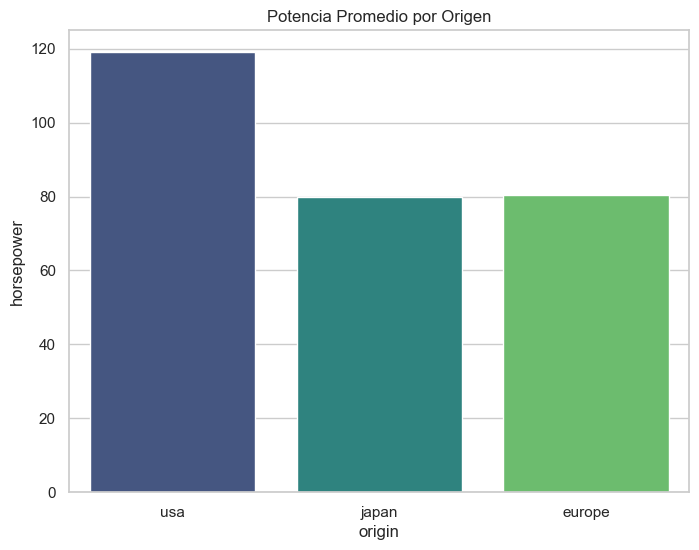

Generando Pairplot (esto puede tardar unos segundos)...


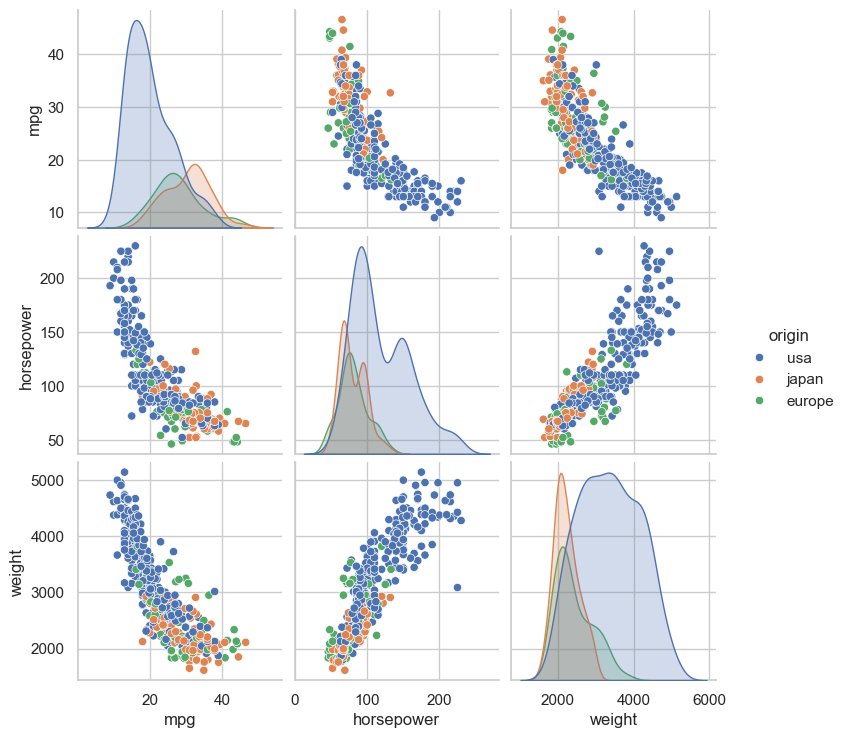

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. CARGAR DATOS (Usamos 'mpg' de nuevo, es perfecto para esto)
df = sns.load_dataset('mpg')

# Configuración estética (Opcional pero recomendado)
sns.set_theme(style="whitegrid")

# --- CASO 1: ANÁLISIS DE UNA VARIABLE (Histograma & Boxplot) ---
plt.figure(figsize=(12, 5))

# A) Histograma: Ver la distribución de caballos de fuerza
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='horsepower', kde=True, color='blue')
plt.title("Distribución de Potencia (Histograma)")

# B) Boxplot: Detectar Outliers (Coches con potencia anormal)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='horsepower', color='orange')
plt.title("Detectando Anomalías (Boxplot)")
plt.show()


# --- CASO 2: RELACIÓN ENTRE DOS VARIABLES (Scatter & Regresión) ---
# ¿Gasta más gasolina un coche más pesado?
plt.figure(figsize=(8, 6))
# lmplot crea el Scatter y dibuja la línea de tendencia (regresión) automáticamente
sns.regplot(data=df, x='weight', y='mpg', line_kws={"color": "red"})
plt.title("Peso vs. Consumo (Scatter Plot)")
plt.show()


# --- CASO 3: COMPARACIÓN CATEGÓRICA (Bar Plot) ---
# ¿Qué país fabrica los coches más potentes?
plt.figure(figsize=(8, 6))
# ci=None quita las barritas de error para que se vea más limpio
sns.barplot(data=df, x='origin', y='horsepower', estimator=np.mean, palette='viridis', errorbar=None)
plt.title("Potencia Promedio por Origen")
plt.show()


# --- CASO 4: MULTIVARIABLE (Pairplot - El arma secreta) ---
# Cruza TODAS las variables numéricas contra TODAS.
# hue='origin' pinta los puntos según el país.
print("Generando Pairplot (esto puede tardar unos segundos)...")
sns.pairplot(df[['mpg', 'horsepower', 'weight', 'origin']], hue='origin')
plt.show()